In [4]:
import numpy as np
import os
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

## Linear Regression

### The Normal Equation

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Saving figure generated_data_plot


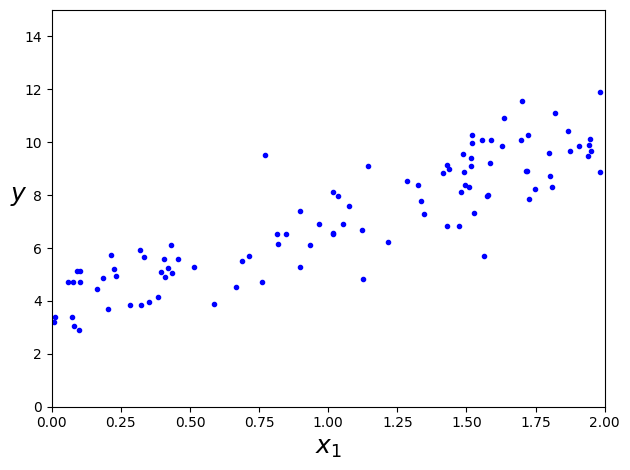

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Compute theta using the Normal Equation. Use the inv() function to compute the inverse of the matrix and the dot() method for the matrix multiplication.

In [9]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
# the fucntion is y = 4 + 3x + gaussian noise
theta_best

array([[3.76090543],
       [3.22405002]])

In [12]:
# now can make predictions using theta-hat
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.76090543],
       [10.20900548]])

Saving figure linear_regression_model_predictions_plot


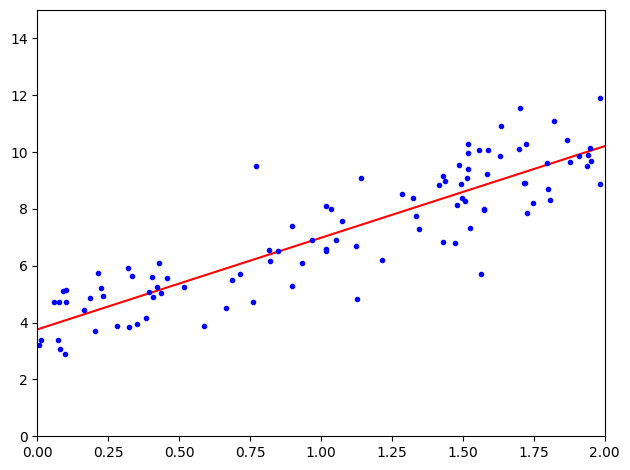

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
save_fig("linear_regression_model_predictions_plot")
plt.show()

### Sk-learn

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.76090543],
       [10.20900548]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.76090543],
       [3.22405002]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.76090543],
       [3.22405002]])

## Gradient Descent

### Batch Gradient Dissent

In [18]:
eta = 0.1 # learning rate
n_iterations= 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[3.76090543],
       [3.22405002]])

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


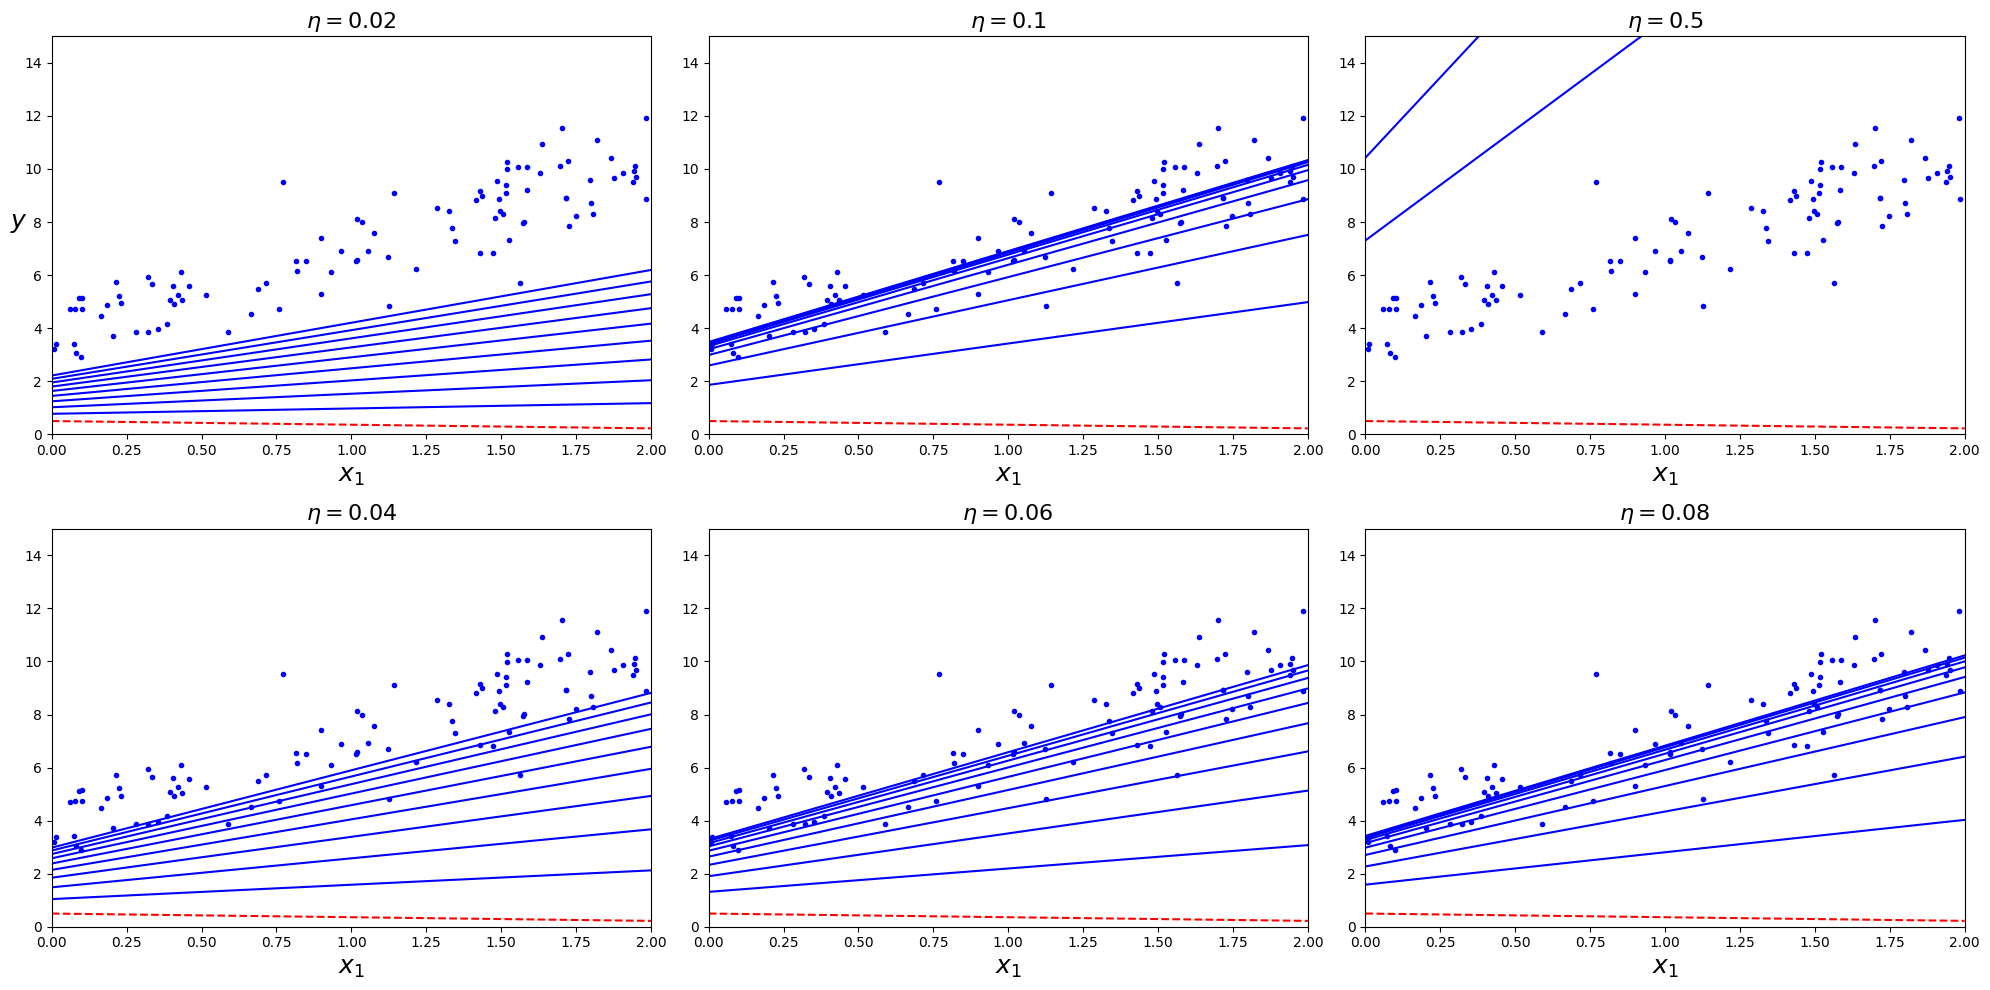

In [31]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(20,10))
# First row of subplots
plt.subplot(231)  # 1st subplot in a 2x3 grid
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(232)  # 2nd subplot in a 2x3 grid
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(233)  # 3rd subplot in a 2x3 grid
plot_gradient_descent(theta, eta=0.5)

# Second row of subplots
plt.subplot(234)  # 4th subplot in a 2x3 grid
plot_gradient_descent(theta, eta=0.04)
plt.subplot(235)  # 5th subplot in a 2x3 grid
plot_gradient_descent(theta, eta=0.06)
plt.subplot(236)  # 6th subplot in a 2x3 grid
plot_gradient_descent(theta, eta=0.08)

save_fig("gradient_descent_plot")
plt.show()